<a href="https://www.kaggle.com/code/hikmatullahmohammadi/titanic-survival-prediction-top-22?scriptVersionId=107604339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style='text-align: center;background: gold; padding: 20px;border: 2px solid'>
    Titanic Survival Prediction
</h1>

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as plot
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
t_df = pd.read_csv('../input/titanic/train.csv', index_col=0)

<h2 style='text-align: center;background: gold; padding: 15px;border: 2px solid'>
    0- Intro</h2>

In [3]:
t_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# columns
np.array(t_df.columns).reshape(-1, 1)

array([['Survived'],
       ['Pclass'],
       ['Name'],
       ['Sex'],
       ['Age'],
       ['SibSp'],
       ['Parch'],
       ['Ticket'],
       ['Fare'],
       ['Cabin'],
       ['Embarked']], dtype=object)

In [5]:
t_df.shape

(891, 11)

The dataset contains **891** observatoins (rows) and **11** features (columns)

In [6]:
# data types
t_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There is not any inappropriate data types

<h2 style='text-align: center;background: gold; padding: 15px;border: 2px solid'>
    1- Data preprocessing</h2>

<h4 style='text-align: center;background: gold; padding: 10px;border: 2px solid'>
    1.1- Handling Missing Values
</h4>

In [8]:
# missing values
t_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are some missing values in 'Age' and 'Cabin' and 'Embarked' columns

In [9]:
# remove Cabin since it has too many missing values
t_df.drop('Cabin', axis=1, inplace=True)

In [10]:
# see if there is any patterns for the NaN values for Age
t_df[t_df.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S


From the above chart, we can conclude that the missing values are completely at random(CAR). 

In [11]:
t_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The mean and the median are quite the same, so we can use any of them to fill the NaN values

In [12]:
# fill the missing values with the median
t_df['Age'].fillna(value=t_df['Age'].median(), inplace=True)

In [13]:
t_df[t_df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [14]:
# fill the 'Embarked' missing values with its mode
t_df['Embarked'].fillna(value=t_df['Embarked'].mode()[0], inplace=True)

In [15]:
t_df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

No more missing values...

<h1 style='text-align: center;background: gold; padding: 15px;border: 2px solid'>
    2- Data exploration and visualization</h1>

t_df.isnull().sum().sum() # no null values

# summary of nummeric features
t_df.iloc[:, 1:].describe()

In [16]:
# let's look at 'Fare'
t_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
t_df[t_df['Fare']==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,S
467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S


In [18]:
# summary of categorical values
t_df.iloc[:, 1:].describe(include='O').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Embarked,891,3,S,646


<h4 style='text-align: center;background: gold; padding: 10px;border: 2px solid'>
    2.1- Data Visualizations
</h4>

Text(0.5, 1.0, 'Survival Counts')

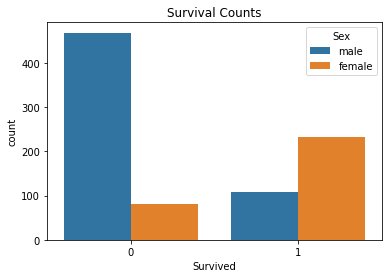

In [19]:
# Survial counts
ax = sns.countplot(data=t_df, x='Survived', hue='Sex')
ax.set_title('Survival Counts')

<AxesSubplot:xlabel='Age', ylabel='Density'>

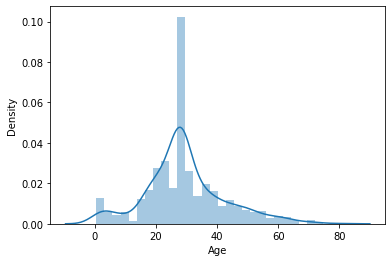

In [20]:
# how Ages are distributed
sns.distplot(t_df['Age'])

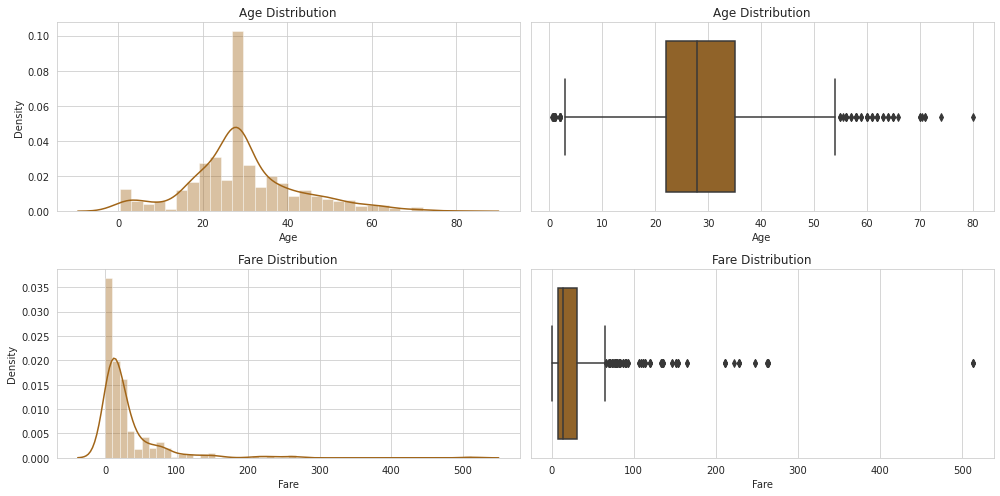

In [21]:
# PLot Age and Fare distributions

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
sns.set_palette('BrBG')

plt.subplot(2,2,1)
ax = sns.distplot(t_df['Age'])
ax.set_title('Age Distribution')
plt.subplot(2,2,2)
ax = sns.boxplot(t_df['Age'])
ax.set_title('Age Distribution')

plt.subplot(2,2,3)
ax = sns.distplot(t_df['Fare'])
ax.set_title('Fare Distribution')
plt.subplot(2,2,4)
ax = sns.boxplot(t_df['Fare'])
ax.set_title('Fare Distribution')
plt.tight_layout()
plt.show()

There some outliers in 'Fare' feature of which will be taken care in the following cell.

In [22]:
# Replace the values greater than or equal to 200 to 263
t_df['Fare'].replace(t_df['Fare'][t_df['Fare'] >= 200].values, 200, inplace=True)

plot the above again and see the difference

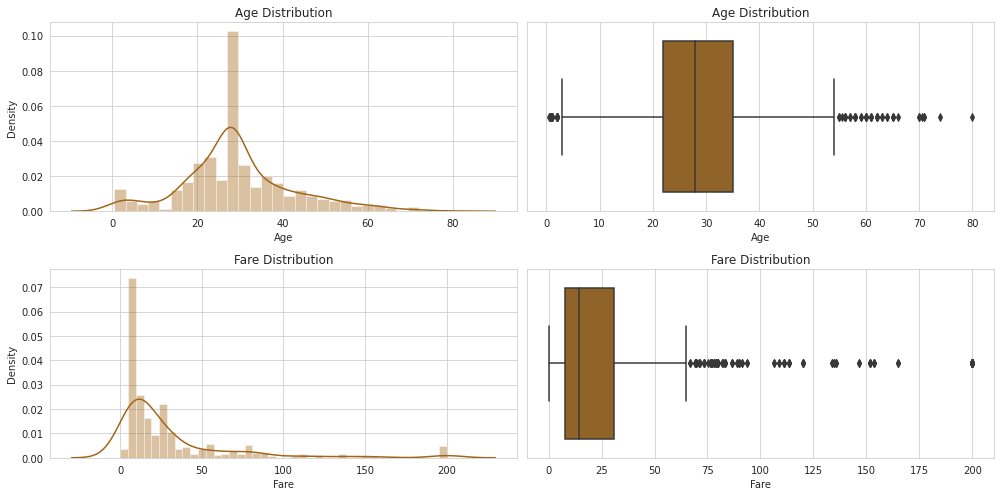

In [23]:
# PLot Age and Fare distributions

plt.figure(figsize=(14,7))
sns.set_style('whitegrid')
sns.set_palette('BrBG')

plt.subplot(2,2,1)
ax = sns.distplot(t_df['Age'])
ax.set_title('Age Distribution')
plt.subplot(2,2,2)
ax = sns.boxplot(t_df['Age'])
ax.set_title('Age Distribution')

plt.subplot(2,2,3)
ax = sns.distplot(t_df['Fare'])
ax.set_title('Fare Distribution')
plt.subplot(2,2,4)
ax = sns.boxplot(t_df['Fare'])
ax.set_title('Fare Distribution')
plt.tight_layout()
plt.show()

In [24]:
t_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

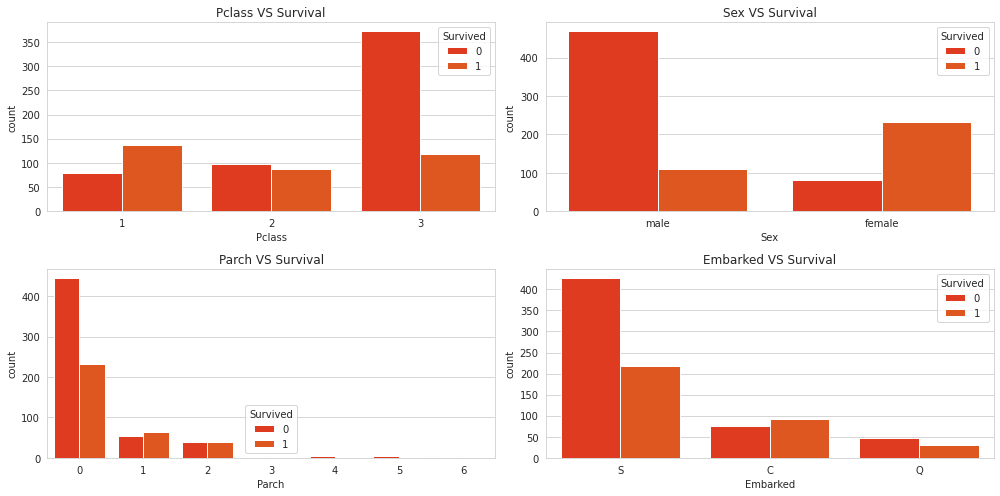

In [25]:
# different categorical variables versus survival

plt.figure(figsize=(14,7))
sns.set_palette('autumn')

plt.subplot(2,2,1)
ax = sns.countplot(t_df['Pclass'], hue=t_df['Survived'])
ax.set_title('Pclass VS Survival')
plt.subplot(2,2,2)
ax = sns.countplot(t_df['Sex'], hue=t_df['Survived'])
ax.set_title('Sex VS Survival')

plt.subplot(2,2,3)
ax = sns.countplot(t_df['Parch'], hue=t_df['Survived'])
ax.set_title('Parch VS Survival')
plt.subplot(2,2,4)
ax = sns.countplot(t_df['Embarked'], hue=t_df['Survived'])
ax.set_title('Embarked VS Survival')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Fare VS Survival')

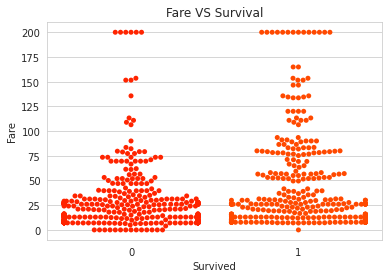

In [26]:
# survival vs fare
ax = sns.swarmplot(data=t_df, x='Survived', y='Fare')
ax.set_title('Fare VS Survival')

<AxesSubplot:xlabel='Fare', ylabel='Age'>

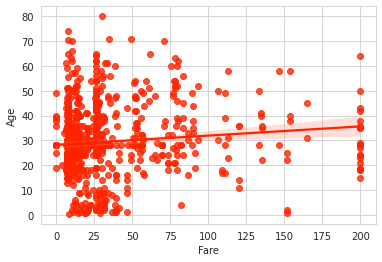

In [27]:
# 'Age' VS 'Fare'
sns.regplot(data=t_df, x='Fare', y='Age')

Text(0.5, 1.0, 'Age VS Survival')

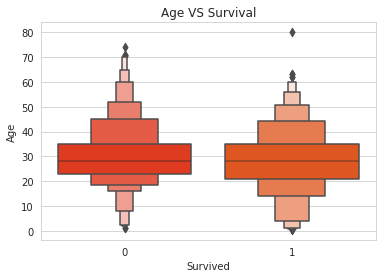

In [28]:
# 'Age' VS 'Survival'
ax = sns.boxenplot(data=t_df, x='Survived', y='Age')
ax.set_title('Age VS Survival')

In [29]:
# correlation between nummeric features
t_df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.285544
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.632356
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.110465
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.202593
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.250993
Fare,0.285544,-0.632356,0.110465,0.202593,0.250993,1.000000


<AxesSubplot:>

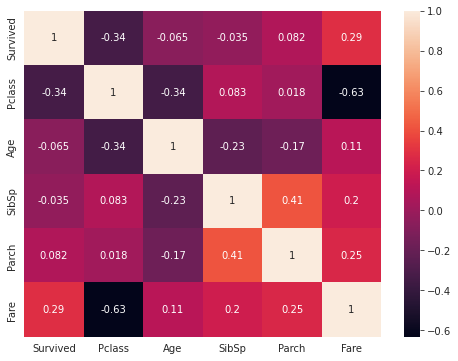

In [30]:
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(t_df.corr(), annot=True)

<h4 style='text-align: center;background: gold; padding: 10px;border: 2px solid'>
    2.2- Explanatory Data Analysis
</h4>

In [31]:
pd.crosstab(
    index=t_df['Sex'],
    columns='Count'
)

col_0,Count
Sex,
female,314
male,577


In [32]:
pd.crosstab(
    index=t_df['Sex'],
    columns=t_df['Survived'],
    margins=True
)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [33]:
pd.crosstab(
    index=t_df['Sex'],
    columns=t_df['Survived'],
    margins=True,
    normalize='index'
)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [34]:
pd.crosstab(
    index=t_df['Sex'],
    columns=t_df['Survived'],
    margins=True,
    normalize=True
)

Survived,0,1,All
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [35]:
t_df.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.285544
Name: Survived, dtype: float64

In [36]:
t_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<h2 style='text-align: center;background: gold; padding: 15px;border: 2px solid'>
    3- Feature Engineering
</h2>

<h4 style='text-align: center;background: gold; padding: 10px;border: 2px solid'>
    3.1- Feature Reduction Using Mutual Information
</h4>

Mutual Information (MI) is a mechanism using which we can see how good each variable has an impact on the target variable, for instance. MI Score helps us find the level of effectiveness of a feature on the target variable, the higher a feature's MI Score, the more effective.
In other words: MI between two features is a measure of the extent to which knowledge of on feature reduces the uncertainty about the other.

In [37]:
X = t_df.drop('Survived', axis=1)
y = t_df['Survived']

In [38]:
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(X, y):
    X1 = X.copy()
    # make sure that all discrete features be converted to numbers
    for i in X1.select_dtypes('object').columns:
        X1[i], _ = X1[i].factorize()
    mi_score = mutual_info_regression(X1, y)
    return pd.Series(mi_score, name='MI Score', index=X1.columns).sort_values(ascending=False)

In [39]:
mi_score = get_mi_score(X, y)
mi_score

Fare        0.137686
Sex         0.134128
Pclass      0.094961
Ticket      0.085301
Parch       0.046472
Name        0.016972
Age         0.015130
SibSp       0.007892
Embarked    0.000000
Name: MI Score, dtype: float64

[Text(0.5, 1.0, 'MI Scores')]

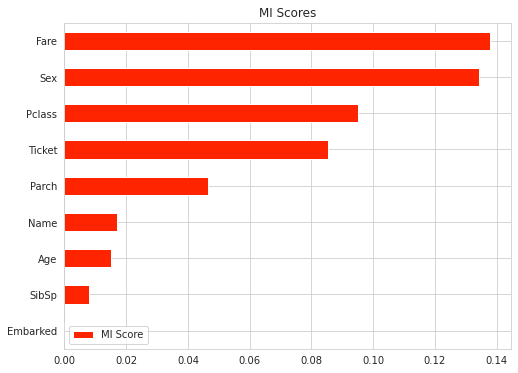

In [40]:
# plot mi scores
mi_score = pd.DataFrame(mi_score).sort_values(by='MI Score')
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
mi_score.plot.barh(ax=ax)
ax.set(title='MI Scores')

We consider removing  'Name' and 'Age' features due to their low mi score.

In [41]:
# remove insignificant features
features = ['Name', 'Ticket', 'Age']
t_df.drop(features, axis=1, inplace=True)

<h4 style='text-align: center;background: gold; padding: 10px;border: 2px solid'>
    3.2- Encoding Categorical Variables
</h4>

In [42]:
t_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [43]:
# encode categorical to numeric features
t_df['Sex'] = t_df['Sex'].map({'male': 1, 'female': 0})

t_df['Embarked'] = t_df['Embarked'].map({
    'C': 0,
    'Q': 1,
    'S': 2
})

In [44]:
t_df.dtypes

Survived      int64
Pclass        int64
Sex           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

All features are of data type 'int' or 'float'

In [45]:
t_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,1,1,0,7.2500,2
2,1,1,0,1,0,71.2833,0
3,1,3,0,0,0,7.9250,2
4,1,1,0,1,0,53.1000,2
5,0,3,1,0,0,8.0500,2


In [46]:
X = t_df.drop('Survived', axis=1)
y = t_df['Survived']

<h2 style='text-align: center;background: gold; padding: 15px;border: 2px solid'>
    3- Modeling
    </h2>

<h4 style='text-align: center;background: gold; padding: 10px;border: 2px solid'>
    3.1- Training the Model
    </h4>

In [47]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [48]:
# Train the model using logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# predict
y_predicted = model.predict(X_test)

In [49]:
# confusion metrix to see the accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, y_test)
cm

array([[164,  30],
       [ 29,  74]])

In [50]:
print('The model Accuracy is: ')
round(np.divide(cm[0, 0] + cm[1, 1], cm.sum()) * 100, 2)

The model Accuracy is: 


80.13

###### Train the model using with whole train dataset.

<h4 style='text-align: center;background: gold; padding: 10px;border: 2px solid'>
    3.2- Using the Model
    </h4>

In [51]:
# load test data
test_df = pd.read_csv('../input/titanic/test.csv', index_col=0)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
# make it ready for the model

# 1- deleting insignificant features
features = ['Name', 'Ticket', 'Cabin', 'Age']
test_df.drop(features, axis=1, inplace=True)

#2- missing values
test_df = test_df.apply(
    lambda x: x.fillna(x.median()) if x.dtype != 'object'\
    else x.fillna(x.mode()[0])
)
# outliers
test_df['Fare'].replace(t_df['Fare'][t_df['Fare'] >= 200].values, 200, inplace=True)

# encoding categorical variables


In [53]:
test_df.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [54]:
# encode categorical to numeric features
test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

test_df['Embarked'] = test_df['Embarked'].map({
    'C': 0,
    'Q': 1,
    'S': 2
})

In [55]:
test_df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
892,3,1,0,0,7.8292,1
893,3,0,1,0,7.0000,2
894,2,1,0,0,9.6875,1
895,3,1,0,0,8.6625,2
896,3,0,1,1,12.2875,2


In [56]:
# predict it
result = model.predict(test_df)

In [57]:
submition = pd.DataFrame({
    "PassengerId": test_df.index,
    "Survived": result
})

In [58]:
submition.to_csv('./submission.csv', index=False)

<h2 style='background: gold; text-align: center; padding: 20px; border: 2px solid'>
    Thank you :)
    </h2>